# Business Understanding

The Wine Quality dataset includes two datasets, red wine and white wine dataset which are related to red and white variants of "Vinho Verde" wine samples, which is a unique product from Minho (northwest) region of Portugal. It is particularly appreciated due to its freshness. 

The dataset contains information about physicochemical and sensory information about the wine. This dataset can be used to model wine preferences from physicochemical properties using data mining. The datasets can be viewed as classification or regression tasks. Since some of the inputs might not be useful for the final test of quality, it could be used to do a feature selection task. Also, it can be used to detect very high/very poor quality wines using Outlier detection.

# Data Understanding

Fixed Acidity: Most of the acids involved with wine are fixed acids. It is a numerical attribute with continuous values, and it is an ordinal attribute, since higher the value, higher the acidity of wine.

Volatile Acidity: This attribute shows the amount of acetic acid in wine, which at high level can lead to unpleasant taste. It is a numerical ordinal attribute with continuous values.

Citric Acid: This attribute shows the amount of citric acid in wine and is in general found in minute quantities in wines. It is a numerical ordinal attribute with continuous values.

Residual Sugar: This attribute shows the amount of sugar remaining after fermentation stops. It is a numerical ordinal Attribute with continuous values.

Chlorides: This attribute shows the amount of salt/chlorides in wine. It is a numerical ordinal attribute with continuous values.

Free Sulfur Dioxide: The amount of free form of Sulphur Dioxide in wine. It is a numerical ordinal attribute with continuous values.

Total Sulfur Dioxide: The amount of free and bound form of Sulphur Dioxide in wine. It is a numerical ordinal attribute with continuous values.

Density: This attribute shows the density of wine. It is a numerical ordinal attribute with continuous values.

pH: This attribute describes about the acidity of wine. It is a numerical ordinal attribute with continuous values.

Sulphates: This attribute tells about the amount of sulphates in the wine. It is a numerical ordinal attribute with continuous values.

Alcohol: This attribute tells about the percentage of alcohol content of the wine. It is a numerical ordinal attribute with continuous values.

Quality: This attribute tells us the quality of the wine. It is a score between 0-10. It is a numerical attribute with continuous values where zero measurement means the worst quality, so it is a Ratio attribute.

In [1]:
#Loading required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Downloading and reading the dataset into a dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", 
           "total sulfur dioxide", "density", "pH", "sulphates","alcohol", "quality"
          ]
data = pd.read_csv(url, sep=';', na_values='?')

#Printing the first few values, to understand about the attributes.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Data Preprocessing: Converting the quality attribute to class
#attribute having values Low and High
data['class'] = data['quality'].apply(lambda x: "Low" if x<=5 else "High")
data = data.drop(columns='quality')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


Before we proceed further, it is always a good practice to first look for any missing values.

In [4]:
# Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
class                   1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


We can see that there are no missing values in this dataset, so we need not do any preprocessing here.

In [5]:
#Fixed Acidity Statistics
print("Fixed Acidity Statistics")
print(data['fixed acidity'].describe())
print("Median Fixed Acidity:", data['fixed acidity'].median())

Fixed Acidity Statistics
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
Median Fixed Acidity: 7.9


Here, we use the describe() function to describe the basic statistics.

Count: Number of values of fixed acidity in the data.
Mean: Mean of all the fixed-acidity values.
Std: Standard deviation of all the fixed-acidity values .
Min: Minimum value of fixed-acidity in data.
25%: 25th percentile value in data.
50%: 50th percentile value in data.
75%: 75th percentile value in data.
Max: Maximum value of fixed-acidity in data.

Apart from these, we also calculate the median value of fixed-acidity. We are now going to calculate these values for all numerical attributes.

In [6]:
#Volatile Acidity Statistics
print("Volatile Acidity Statistics")
print(data['volatile acidity'].describe())
print("Median Volatile Acidity:", data['volatile acidity'].median())

Volatile Acidity Statistics
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
Median Volatile Acidity: 0.52


In [7]:
#Citric Acid Statistics
print("Citric Acid Statistics")
print(data['citric acid'].describe())
print("Median Citric Acid:", data['citric acid'].median())

Citric Acid Statistics
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
Median Citric Acid: 0.26


In [8]:
#Residual Sugar Statistics
print("Residual Sugar Statistics")
print(data['residual sugar'].describe())
print("Median Residual Sugar:", data['residual sugar'].median())

Residual Sugar Statistics
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
Median Residual Sugar: 2.2


In [9]:
#Chlorides Statistics
print("Chlorides Statistics")
print(data['chlorides'].describe())
print("Median Chlorides:", data['chlorides'].median())

Chlorides Statistics
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
Median Chlorides: 0.079


In [10]:
#Free Sulfur Dioxide Statistics
print("Free Sulfur Dioxide Statistics")
print(data['free sulfur dioxide'].describe())
print("Median Free Sulfur Dioxide:", data['free sulfur dioxide'].median())

Free Sulfur Dioxide Statistics
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64
Median Free Sulfur Dioxide: 14.0


In [11]:
#Total Sulfur Dioxide Statistics
print("Total Sulfur Dioxide Statistics")
print(data['total sulfur dioxide'].describe())
print("Median Total Sulfur Dioxide:", data['total sulfur dioxide'].median())

Total Sulfur Dioxide Statistics
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
Median Total Sulfur Dioxide: 38.0


In [12]:
#Density Statistics
print("Density Statistics")
print(data['density'].describe())
print("Median Density:", data['density'].median())

Density Statistics
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64
Median Density: 0.99675


In [13]:
#pH Statistics
print("pH Statistics")
print(data['pH'].describe())
print("Median pH:", data['pH'].median())

pH Statistics
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
Median pH: 3.31


In [14]:
#Sulphates Statistics
print("Sulphates Statistics")
print(data['sulphates'].describe())
print("Median Sulphates:", data['sulphates'].median())

Sulphates Statistics
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
Median Sulphates: 0.62


In [15]:
#Alcohol Statistics
print("Alcohol Statistics")
print(data['alcohol'].describe())
print("Median Alcohol:", data['alcohol'].median())

Alcohol Statistics
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
Median Alcohol: 10.2


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101697a90>,
      dtype=object)

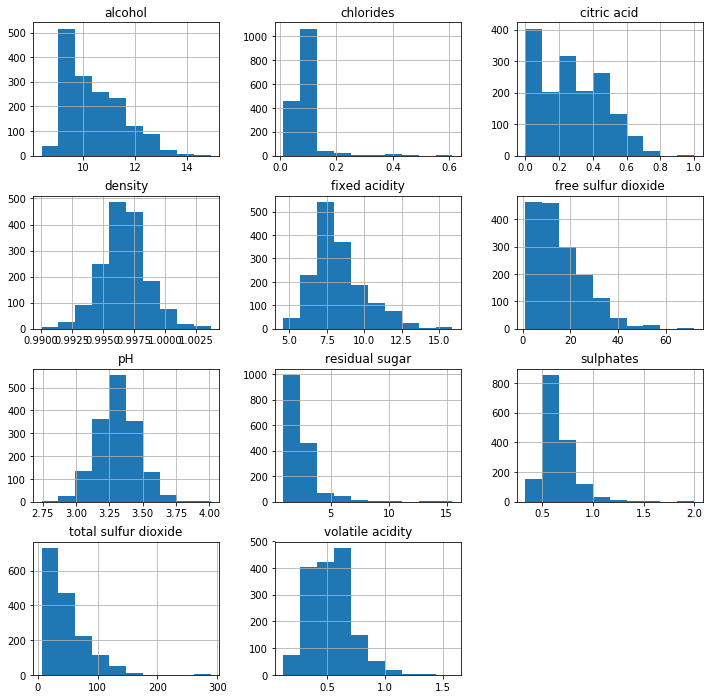

In [16]:
# Plotting histogram for numerical attributes
numerical_attributes = data.select_dtypes(include=['float64'])
numerical_attributes.hist(figsize=(12,12))

The visualization of the numerical attributes give us a few interesting insights on the distribution of values.
1. The alcohol content in most of the wines is around 7-8%.
2. Chloride content is generally around 0.1. However, there are very few wines with a high chloride content of around 0.6.
3. The free sulfur dioxide and total sulphur dioxide quantity is generally around 0-20, but few wines have very high total sulfur dioxide content around 280.
4. Most of the wines have a pH around 3-4.
5. The density of wine is close to density of water, around 0.9975 generally.
6. The volatile acidity is around 0.6 whereas the fixed/non-volatile acidity is around 7.5 for most of the wines, which looks good as more volatile acidity leads to bad wines.

For categorical attributes, we can view the count plot to see their frequency distributions. However, here we have only one categorical attribute 'class'.

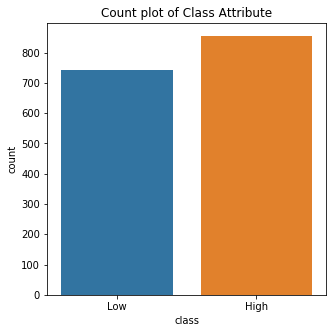

In [17]:
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])

# Class count plot
plt.figure(figsize=(5,5))
plt.title("Count plot of Class Attribute")
sns.countplot(data=categorical_attributes, x="class")

The number of low quality and high quality wines collected are almost the same, with the data slightly skewed towards the higher quality wines.

Now, we will look at the relationships among various attributes, with hue as the class attribute. We will use pairplot to explore the pairwise relationship among attributes. 

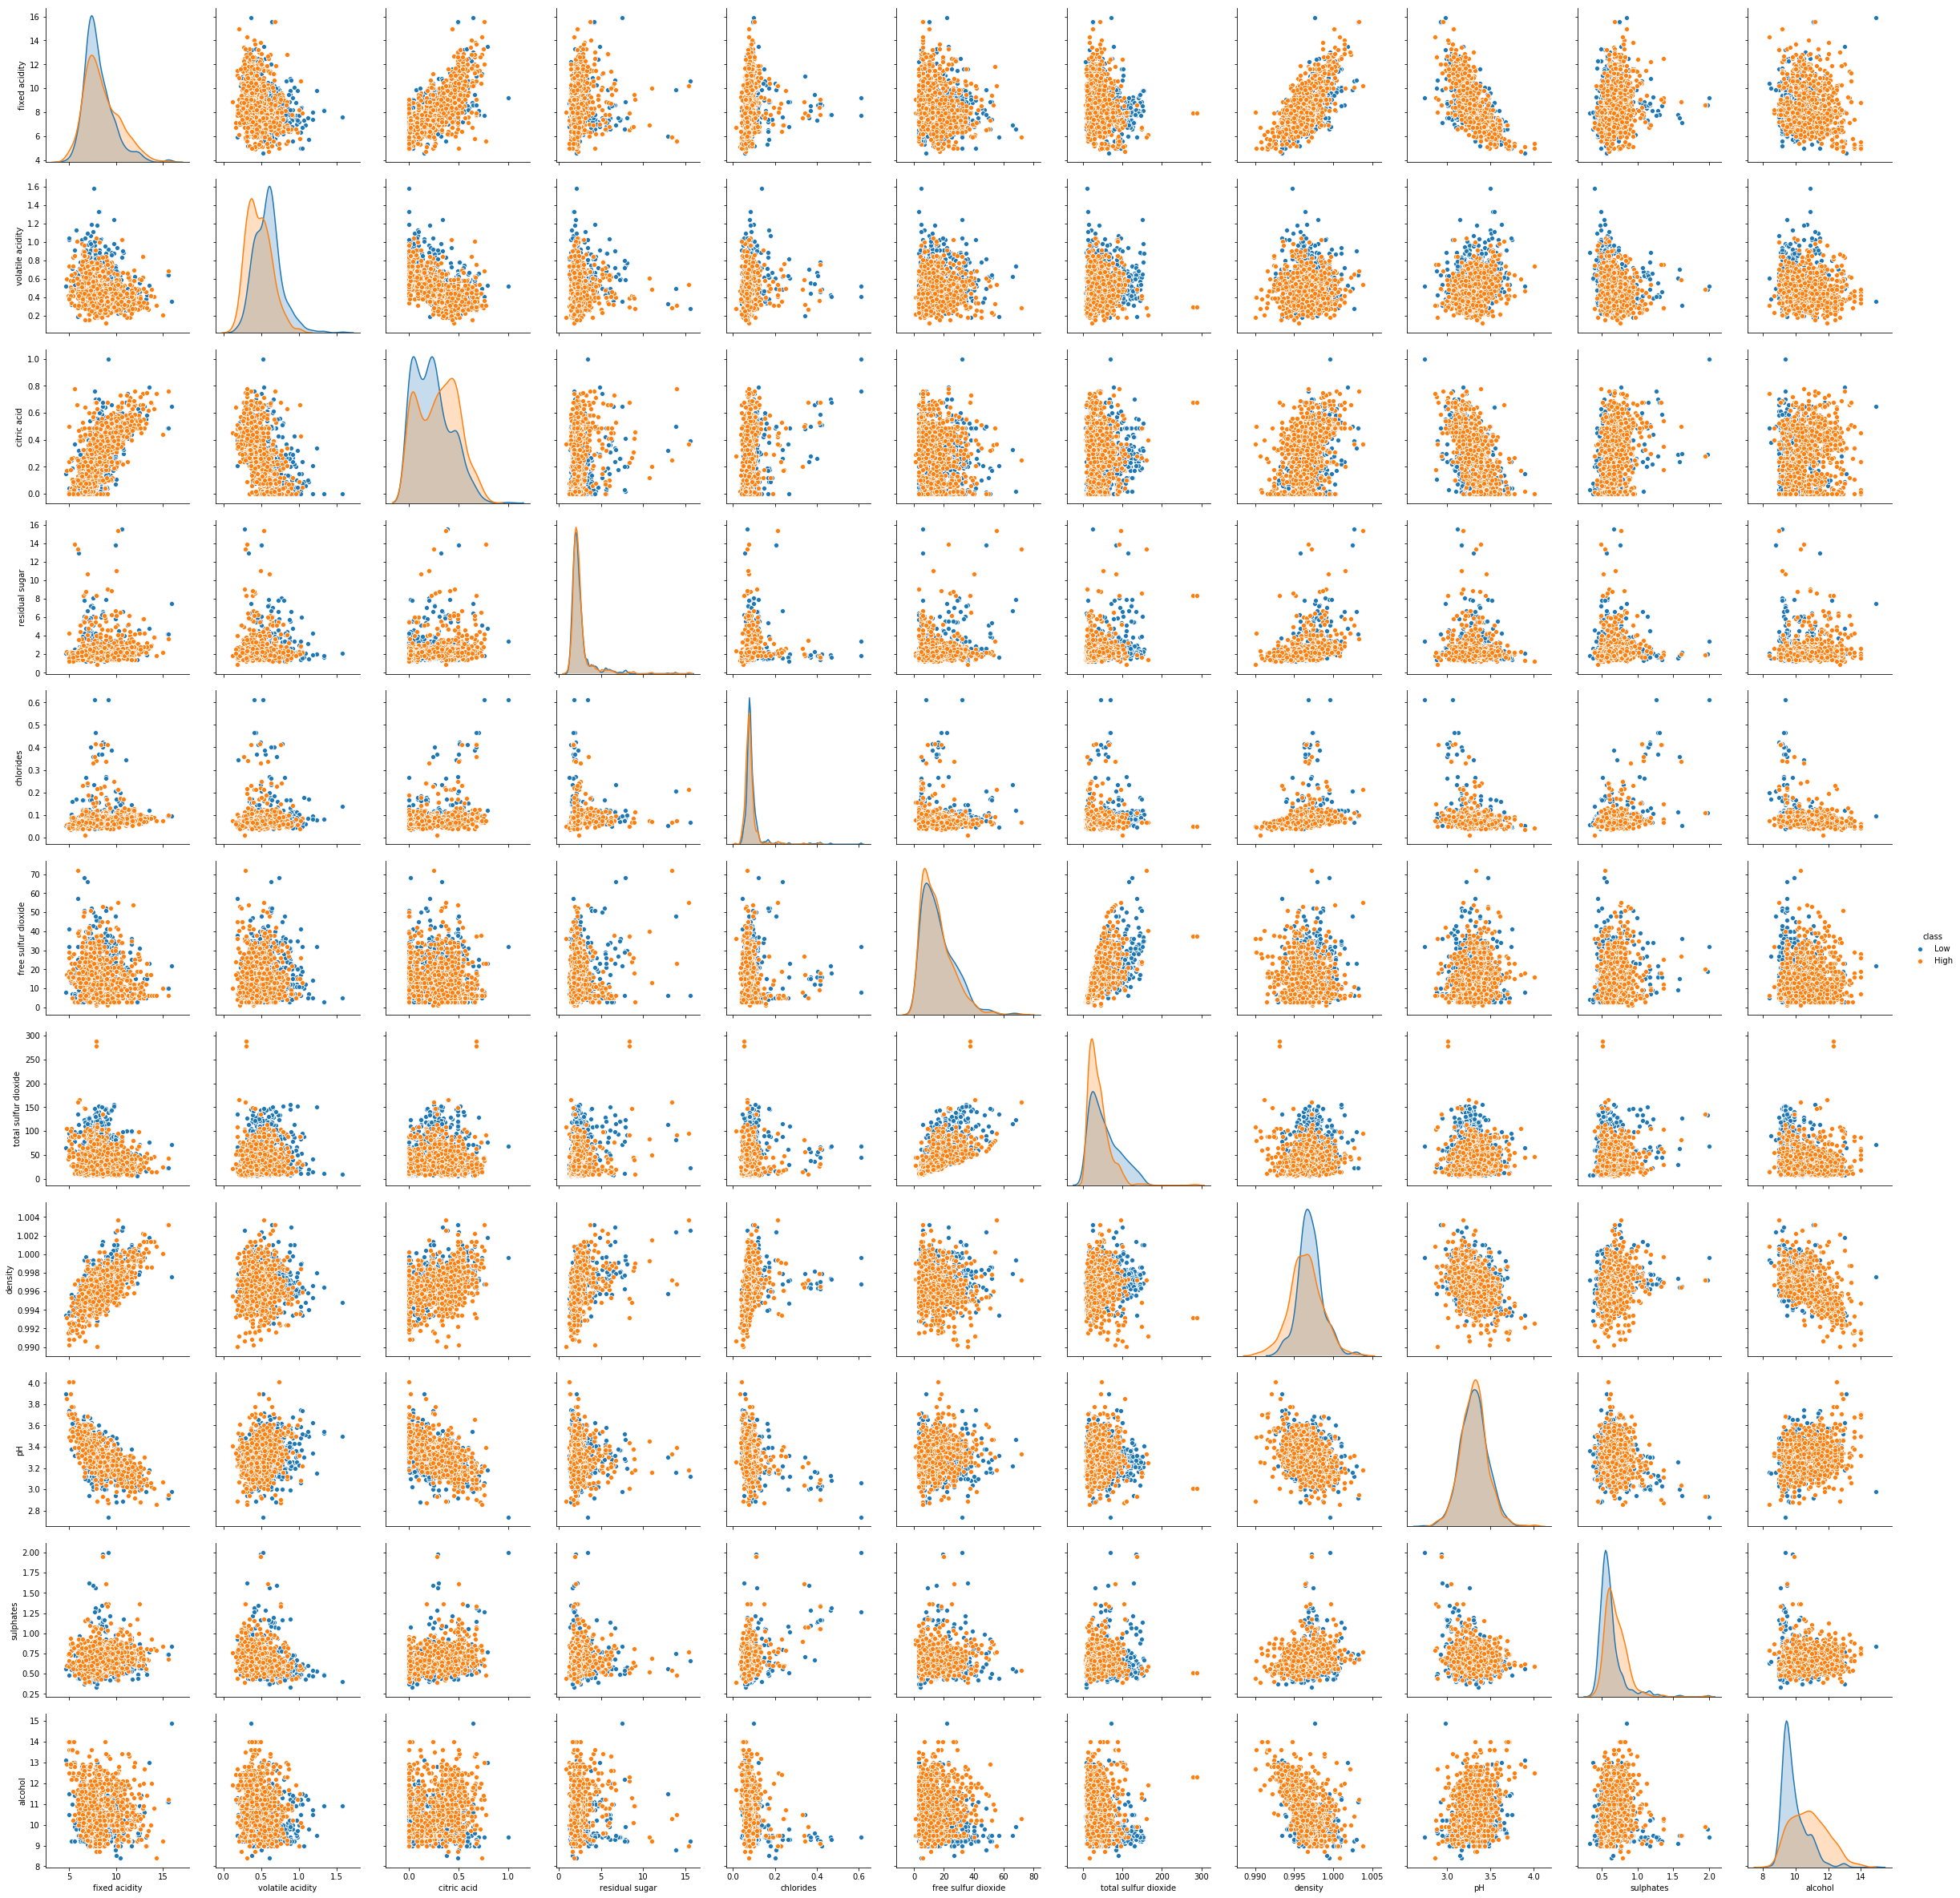

In [18]:
# Pairplot 
sns.pairplot(data, height=3, diag_kind='kde', hue='class')

We will also plot the correlation heatmap to better understand the relationship among the attributes.

Text(0.5,1.05,'Pearson Correlation of Features')

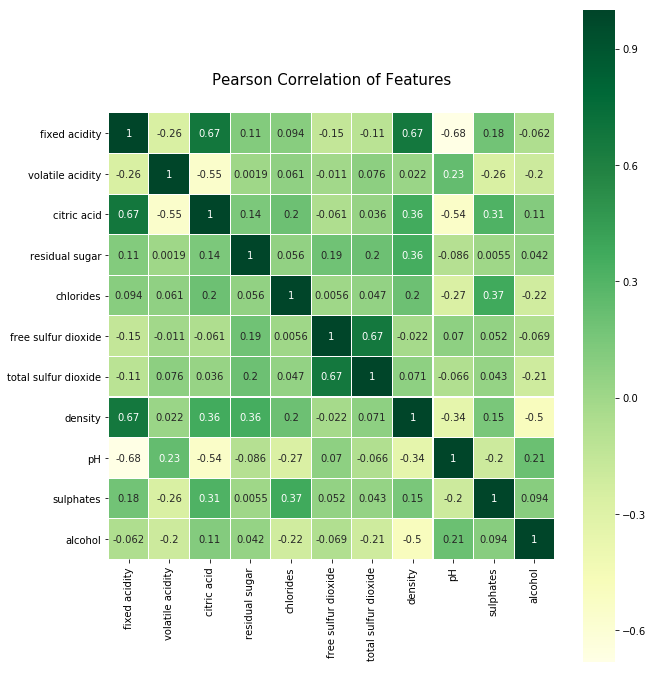

In [19]:
#Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

From the above plots, we can find a few relationships.
1. There is a high correlation between fixed acidity and citric acid, which makes sense as citric acid adds to total amount of fixed acidity.
2. There is also a high correlation between fixed acidity and density.
3. There is also a high correlation between free sulfur dioxide and total sulfur dioxide which says total sulfur dioxide increases with free sulfur dioxide.
4. Also we can see that there is some correlation between sulphates and chlorides.

It is generally a good practice to remove correlated attributes during feature selection.

The correlation matrix shows that the following independent attributes are redundant relative to each other.
1. Fixed Acidity and Citric Acid
2. Fixed Acidity and Density 
3. Free Sulfur Dioxide and Total Sulfur Dioxide 

For detecting outliers, we can use the histograms plotted above as well as plot box plot for each attribute.

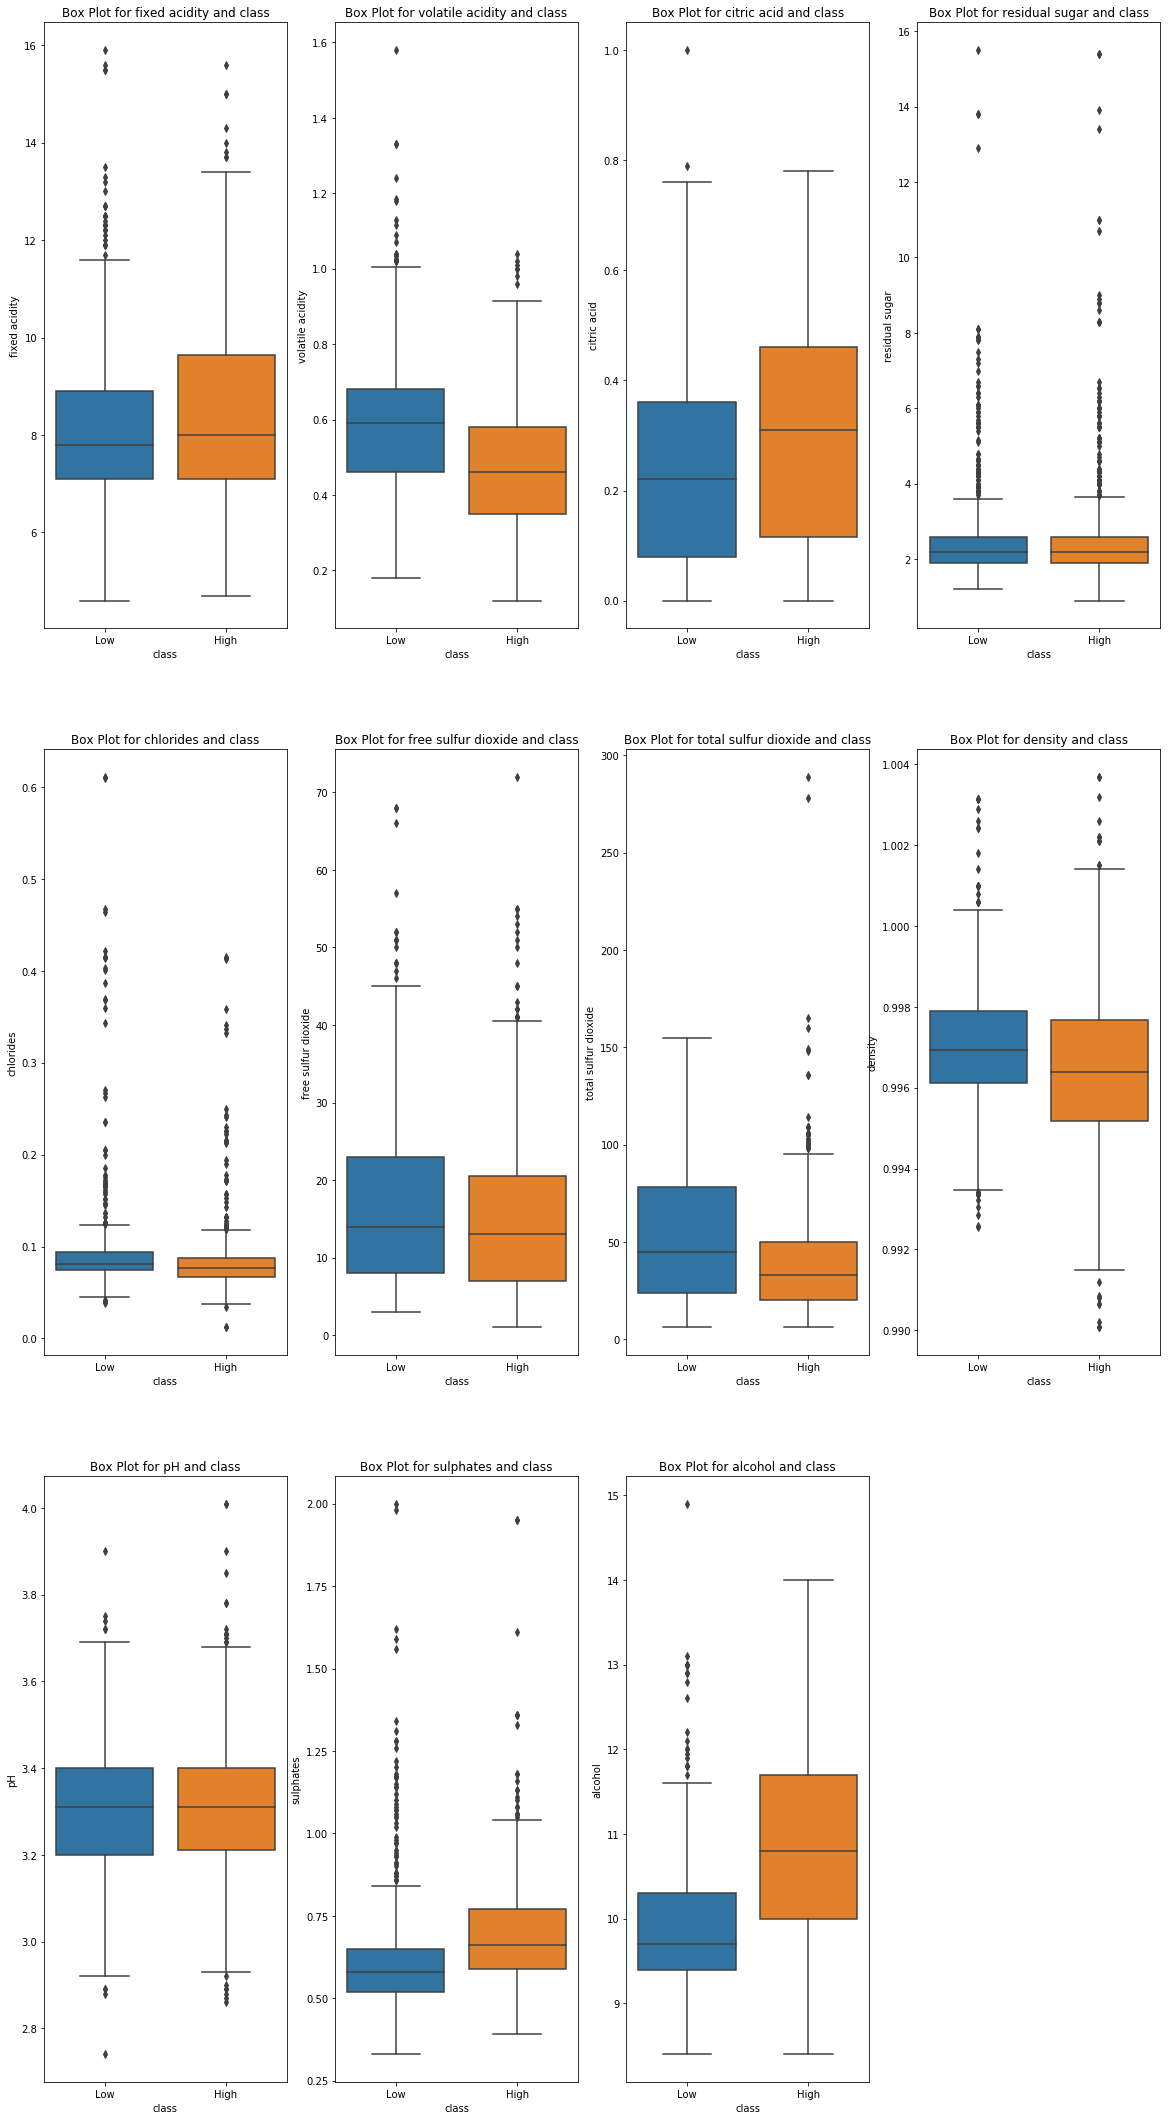

In [20]:
# Plot box plot for ax and class attribute
number_of_columns = len(columns)-1
plt.figure(figsize=(20,800))
for i in range(number_of_columns):
    plt.subplot(60,4,i+1)
    ax = sns.boxplot('class', columns[i],  data = data, orient='v')
    ax.set_title("Box Plot for " + columns[i] + " and class")

From the above box plots, we can see that almost every attribute has outliers. While finding wine quality, it would not be a good suggestion to remove the outliers as they could lead to very high/very low quality wines.

Now, to check the relationships of all attributes with the class label, we can convert class attribute into a numerical attribute (0 for low quality and 1 for high quality) and then plot correlation matrix and also use the box plots plotted above, to find out the strongest and weakest relationship between class attribute and other attributes.

In [21]:
#Adding a column num-class for plotting pair plot and correlation matrix

data['num-class'] = data['class'].apply(lambda x: 0 if x=="Low" else 1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,num-class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,0


Text(0.5,1.05,'Pearson Correlation of Features')

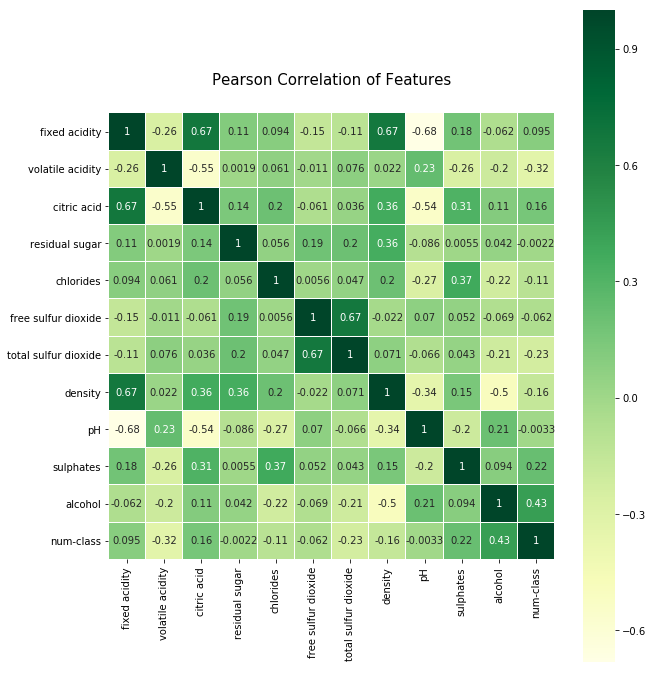

In [22]:
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

The correlation matrix above shows that Alcohol has the strongest relationship to the class label. The box plots plotted above confirm that as they have the largest variation of values between low and high quality wines.

The correlation matrix also show that Residual Sugar has the weakest relationship to the class label closely followed by pH. The box plots also confirm that as they have the least variation of values between low and high quality wines.

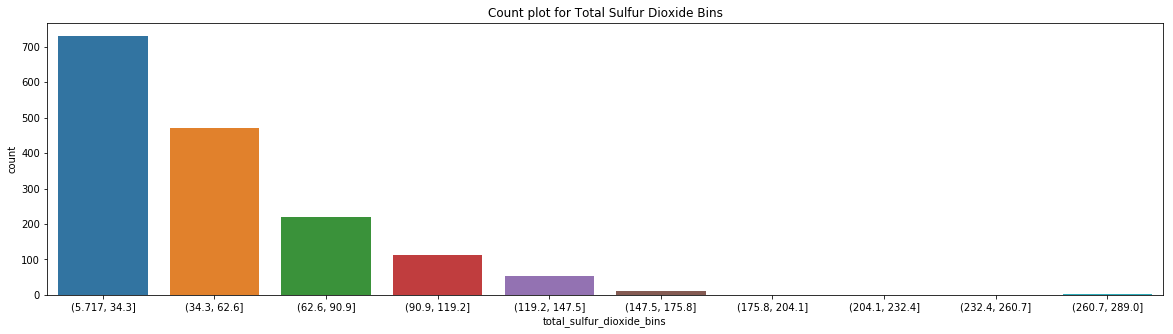

In [23]:
#Discretization of total sulfur dioxide into equal interval bins
data['total_sulfur_dioxide_bins'] = pd.cut(data['total sulfur dioxide'], 10)

# Plotting count plot for total sulfur dioxide bins
fig = plt.figure(figsize=(20,5))
plt.title("Count plot for Total Sulfur Dioxide Bins")
sns.countplot(x="total_sulfur_dioxide_bins", data=data)

This kind of discretization gives us a more detailed plot than a histogram regarding the distribution of total sulfur dioxide content among wines. We can see more than half of the wines have sulfur dioxide content between 5.7 and 34.3. 

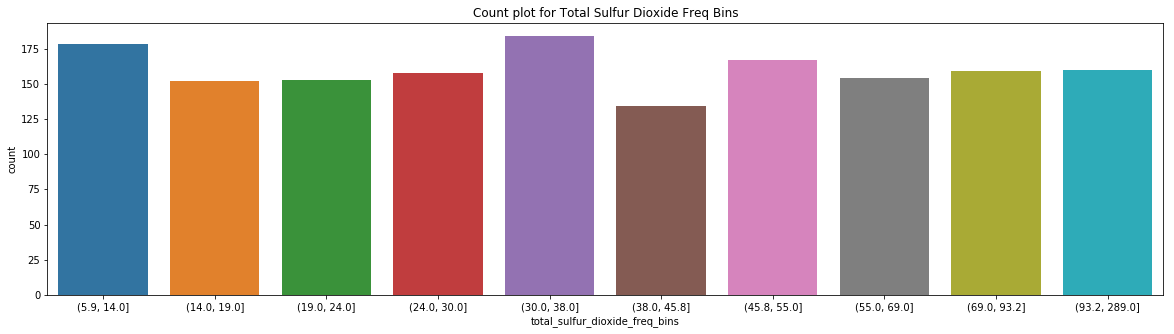

In [24]:
#Discretization of total sulfur dioxide into equal frequency bins
data['total_sulfur_dioxide_freq_bins'] = pd.qcut(data['total sulfur dioxide'], q=10, precision=1, duplicates='drop')

# Plotting count plot for total sulfur dioxide bins
fig = plt.figure(figsize=(20,5))
plt.title("Count plot for Total Sulfur Dioxide Freq Bins")
sns.countplot(x="total_sulfur_dioxide_freq_bins", data=data)

Discretization of bins into equal frequency gives us a more uniform count plot. However, not all bins are of the same size. This is because there might be a multiple rows which have same values of total sulfur dioxides and they have to classified into same bins. This leads to different sizes. However, the variation in sizes is not huge compared to equal interval bins.

These bins could be useful to compare the relationship between total sulfur dioxide and quality.

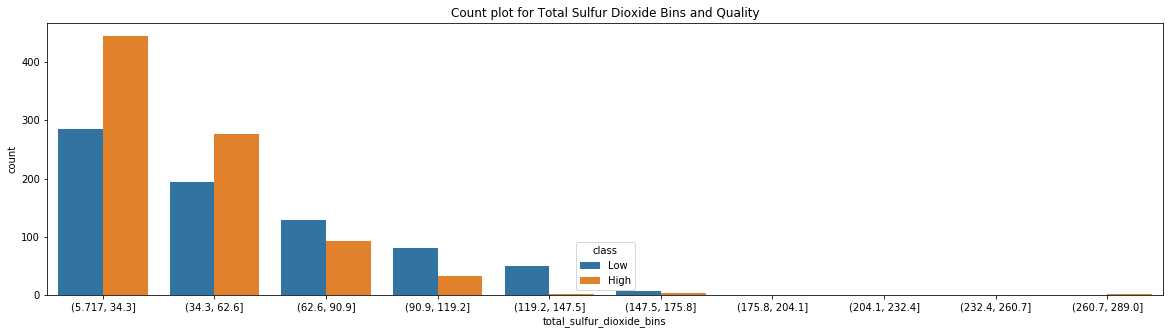

In [25]:
# Plotting count plot for total sulfur dioxide bins and class
fig = plt.figure(figsize=(20,5))
plt.title("Count plot for Total Sulfur Dioxide Bins and Quality")
sns.countplot(x="total_sulfur_dioxide_bins",hue="class", data=data)

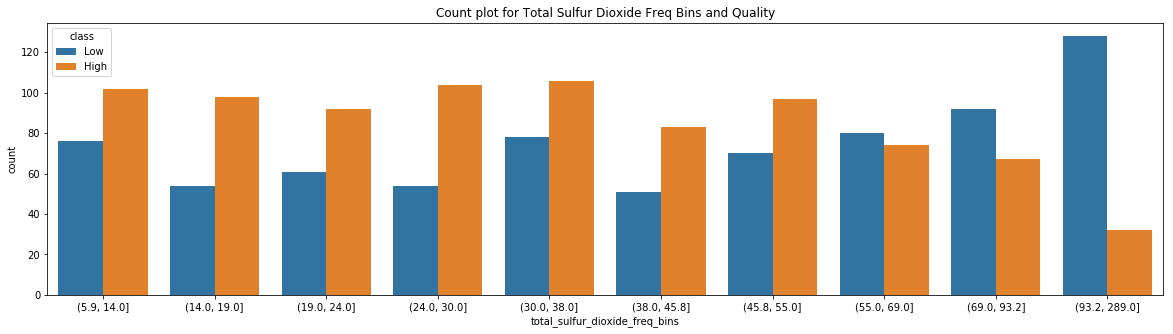

In [26]:
# Plotting count plot for total sulfur dioxide frequency bins and class
fig = plt.figure(figsize=(20,5))
plt.title("Count plot for Total Sulfur Dioxide Freq Bins and Quality")
sns.countplot(x="total_sulfur_dioxide_freq_bins",hue="class", data=data)

The count plot for Equal Frequency discretized bins gives a more detailed outlook about the quality of wines and total sulfur dioxide content than equal interval width discretization.

In [27]:
# Log transformation of alcohol attribute
data['log_alcohol'] = np.log(data['alcohol'])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,num-class,total_sulfur_dioxide_bins,total_sulfur_dioxide_freq_bins,log_alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,0,"(5.717, 34.3]","(30.0, 38.0]",2.240710
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low,0,"(62.6, 90.9]","(55.0, 69.0]",2.282382
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low,0,"(34.3, 62.6]","(45.8, 55.0]",2.282382
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High,1,"(34.3, 62.6]","(55.0, 69.0]",2.282382
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,0,"(5.717, 34.3]","(30.0, 38.0]",2.240710


We will plot the histogram and box plots to compare the transformed and the original attribute.

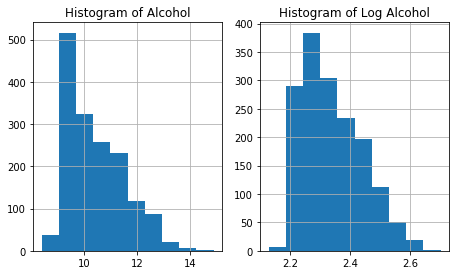

In [28]:
# Plotting histogram for Alcohol and Log Alcohol
plt.figure(figsize=(40,100))
plt.subplot(20,10,1)
plt.title("Histogram of Alcohol")
data['alcohol'].hist()
plt.subplot(20,10,2)
plt.title("Histogram of Log Alcohol")
data['log_alcohol'].hist()

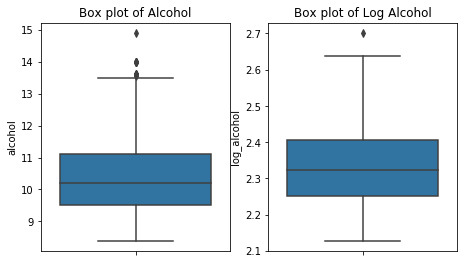

In [29]:
# Plotting box plot for Alcohol and Log Alcohol
plt.figure(figsize=(40,100))
plt.subplot(20,10,1)
plt.title("Box plot of Alcohol")
sns.boxplot('alcohol', data=data, orient='v')
plt.subplot(20,10,2)
plt.title("Box plot of Log Alcohol")
sns.boxplot('log_alcohol', data=data, orient='v')

From the above two plots we can see, log transformation normalizes the data to an extent, especially when the range of values is very high. We can see that log transformation reduced the number of outliers in the data, and could be used in the model in place of non-transformed attribute.

We will use python MDLP module for Entropy based discretization. It provides a direct API to convert attribute into bins based on entropy. For more information, check https://github.com/hlin117/mdlp-discretization

The fit_transform method of MDLP converts continuous values into bins based on entropy.  

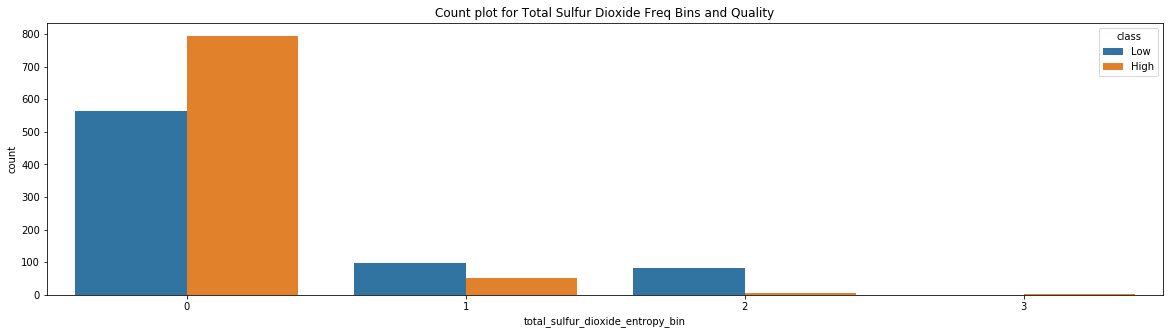

In [30]:
#Supervised discretization
from mdlp.discretization import MDLP
mdlp = MDLP()
X = data['total sulfur dioxide'].values.reshape(-1,1)
conv_X = mdlp.fit_transform(X, data['num-class'])
data['total_sulfur_dioxide_entropy_bin'] = pd.DataFrame(conv_X)
fig = plt.figure(figsize=(20,5))
plt.title("Count plot for Total Sulfur Dioxide Freq Bins and Quality")
sns.countplot(x="total_sulfur_dioxide_entropy_bin",hue="class", data=data)

Let's check on the cut/interval points before understanding the count plot.

In [31]:
#Cut Points
print(mdlp.cut_points_)

[array([ 81.5, 109. , 157.5])]


We can see that based on entropy, the total sulfur dioxide is divided into 4 bins. (-inf,81],(81,109.5],(109.5,157.5],(157.5,inf). Most of the values for total sulfur dioxide is in the first interval. While frequency and equal interval binning divides into number of bins of our choice, whereas supervised discretization divides the data into bins such that there is maximum information gain.

The module further divides into unique values of 0,1,2,3 for different bins, which makes it easier to analyze.

Now, we will do Standardization and Normalization for Total Sulfur Dioxide and Alcohol. We will also plot histograms and box plot for actual, standardized and normalized values which would give us a better idea about the usefulness of standardization and normalization.

In [32]:
# Standardization and Normalization

#Normalizing total sulfur dioxide
data['total_sulfur_dioxide_normalized'] = (data['total sulfur dioxide'] - data['total sulfur dioxide'].min()) / (data['total sulfur dioxide'].max() - data['total sulfur dioxide'].min())
data['alcohol_normalized'] = (data['alcohol'] - data['alcohol'].min()) / (data['alcohol'].max() - data['alcohol'].min())
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,num-class,total_sulfur_dioxide_bins,total_sulfur_dioxide_freq_bins,log_alcohol,total_sulfur_dioxide_entropy_bin,total_sulfur_dioxide_normalized,alcohol_normalized
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,0,"(5.717, 34.3]","(30.0, 38.0]",2.240710,0,0.098940,0.153846
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low,0,"(62.6, 90.9]","(55.0, 69.0]",2.282382,0,0.215548,0.215385
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low,0,"(34.3, 62.6]","(45.8, 55.0]",2.282382,0,0.169611,0.215385
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High,1,"(34.3, 62.6]","(55.0, 69.0]",2.282382,0,0.190813,0.215385
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,0,"(5.717, 34.3]","(30.0, 38.0]",2.240710,0,0.098940,0.153846


In [33]:
#Standardizing total sulfur dioxide
data['total_sulfur_dioxide_standardized'] = (data['total sulfur dioxide'] - data['total sulfur dioxide'].mean()) / (data['total sulfur dioxide'].std())
data['alcohol_standardized'] = (data['alcohol'] - data['alcohol'].mean()) / (data['alcohol'].std())
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,class,num-class,total_sulfur_dioxide_bins,total_sulfur_dioxide_freq_bins,log_alcohol,total_sulfur_dioxide_entropy_bin,total_sulfur_dioxide_normalized,alcohol_normalized,total_sulfur_dioxide_standardized,alcohol_standardized
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,Low,0,"(5.717, 34.3]","(30.0, 38.0]",2.240710,0,0.098940,0.153846,-0.379014,-0.959946
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,Low,0,"(62.6, 90.9]","(55.0, 69.0]",2.282382,0,0.215548,0.215385,0.624168,-0.584594
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,Low,0,"(34.3, 62.6]","(45.8, 55.0]",2.282382,0,0.169611,0.215385,0.228975,-0.584594
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,High,1,"(34.3, 62.6]","(55.0, 69.0]",2.282382,0,0.190813,0.215385,0.411372,-0.584594
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,Low,0,"(5.717, 34.3]","(30.0, 38.0]",2.240710,0,0.098940,0.153846,-0.379014,-0.959946


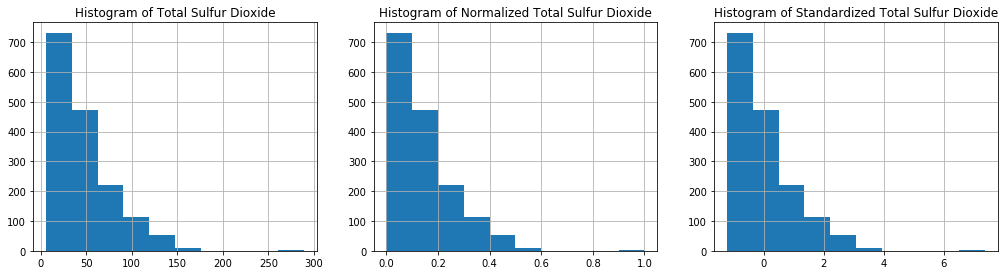

In [34]:
# Plotting histogram for Total Sulfur Dioxide and its normalized and standardized values
plt.figure(figsize=(60,100))
plt.subplot(20,10,1)
plt.title("Histogram of Total Sulfur Dioxide")
data['total sulfur dioxide'].hist()
plt.subplot(20,10,2)
plt.title("Histogram of Normalized Total Sulfur Dioxide")
data['total_sulfur_dioxide_normalized'].hist()
plt.subplot(20,10,3)
plt.title("Histogram of Standardized Total Sulfur Dioxide")
data['total_sulfur_dioxide_standardized'].hist()

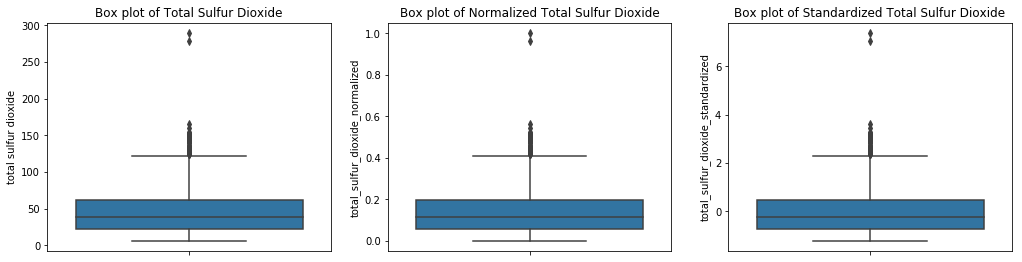

In [35]:
# Plotting box plot for for Total Sulfur Dioxide and its normalized and standardized values
plt.figure(figsize=(60,100))
plt.subplot(20,10,1)
plt.title("Box plot of Total Sulfur Dioxide")
sns.boxplot('total sulfur dioxide', data=data,orient='v')
plt.subplot(20,10,2)
plt.title("Box plot of Normalized Total Sulfur Dioxide")
sns.boxplot('total_sulfur_dioxide_normalized', data=data,orient='v')
plt.subplot(20,10,3)
plt.title("Box plot of Standardized Total Sulfur Dioxide")
sns.boxplot('total_sulfur_dioxide_standardized', data=data,orient='v')

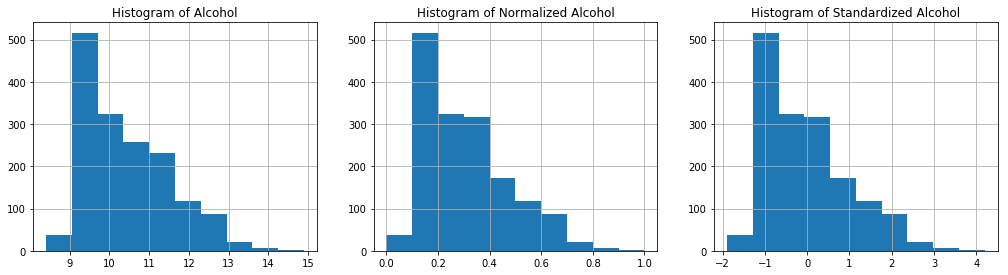

In [36]:
# Plotting histogram for Alcohol and its normalized and standardized values
plt.figure(figsize=(60,100))
plt.subplot(20,10,1)
plt.title("Histogram of Alcohol")
data['alcohol'].hist()
plt.subplot(20,10,2)
plt.title("Histogram of Normalized Alcohol")
data['alcohol_normalized'].hist()
plt.subplot(20,10,3)
plt.title("Histogram of Standardized Alcohol")
data['alcohol_standardized'].hist()

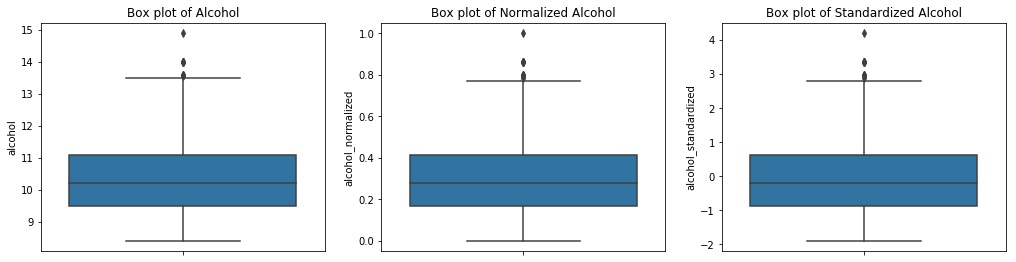

In [37]:
# Plotting box plot for for Alcohol and its normalized and standardized values
plt.figure(figsize=(60,100))
plt.subplot(20,10,1)
plt.title("Box plot of Alcohol")
sns.boxplot('alcohol', data=data,orient='v')
plt.subplot(20,10,2)
plt.title("Box plot of Normalized Alcohol")
sns.boxplot('alcohol_normalized', data=data,orient='v')
plt.subplot(20,10,3)
plt.title("Box plot of Standardized Alcohol")
sns.boxplot('alcohol_standardized', data=data,orient='v')

We can see that both normalization and standardization make training data less sensitive to different scales,ie. it scales the data to a smaller scale. When we have different features in different scale, it helps in reducing data to same scale, thereby improving the results. It also results in reducing the number of outliers as the scales are smaller.

Now, to perform PCA we will use Scikit-Learn package. Scikit-Learn is a python module for data mining and data analysis. For more information, please visit https://scikit-learn.org/ .

We will use all components initially to transform the data using PCA. We will first do analysis on the unscaled data. PCA in general works better after the data is scaled using Standardization. We will also do analysis using standardized data.

In [38]:
# PCA using sklearn
from sklearn.decomposition import PCA
# Using all components initially
pca = PCA()
data_pca = pd.read_csv(url, sep=';', na_values='?')
data_pca = data_pca.drop(columns="quality")
x_pca = pca.fit_transform(data_pca)

In [39]:
# Basic analysis
print("Initial Shape:",data_pca.shape)
print("PCA Shape:",x_pca.shape)
print("PCA components:",pca.n_components_)

#Printing the eigen values and eigen vectors of the data
print("Eigen Values:", pca.explained_variance_)
print("Eigen Vector:",pca.components_)

Initial Shape: (1599, 11)
PCA Shape: (1599, 11)
PCA components: 11
Eigen Values: [1.13380708e+03 5.79354108e+01 3.10130228e+00 1.81941532e+00
 1.04634036e+00 4.13967294e-02 2.31926578e-02 1.13464685e-02
 1.00779841e-02 1.45499755e-03 5.61482667e-07]
Eigen Vector: [[-6.13247431e-03  3.84465551e-04  1.70902595e-04  8.64894648e-03
   6.37307290e-05  2.18857434e-01  9.75678369e-01  3.72498542e-06
  -2.68008619e-04  2.23381730e-04 -6.35846721e-03]
 [-2.38994985e-02 -2.00966661e-03 -3.03480788e-03  1.11348551e-02
  -2.36654751e-04  9.75265982e-01 -2.18916841e-01 -2.49998510e-05
   3.27182194e-03  6.18926046e-04  1.45642451e-02]
 [ 9.53135980e-01 -2.51315387e-02  7.37082746e-02  2.80913620e-01
   2.94578815e-03  2.08968395e-02 -1.52685886e-03  7.76139600e-04
  -5.86305467e-02  1.75252442e-02 -4.85991164e-02]
 [-2.65092214e-01  7.27374987e-03 -9.83215158e-03  9.43177990e-01
  -6.45262673e-04 -2.11894371e-02 -3.97992967e-03  5.52088341e-05
   2.05779719e-02 -7.19926307e-03  1.97613982e-01]
 [ 9

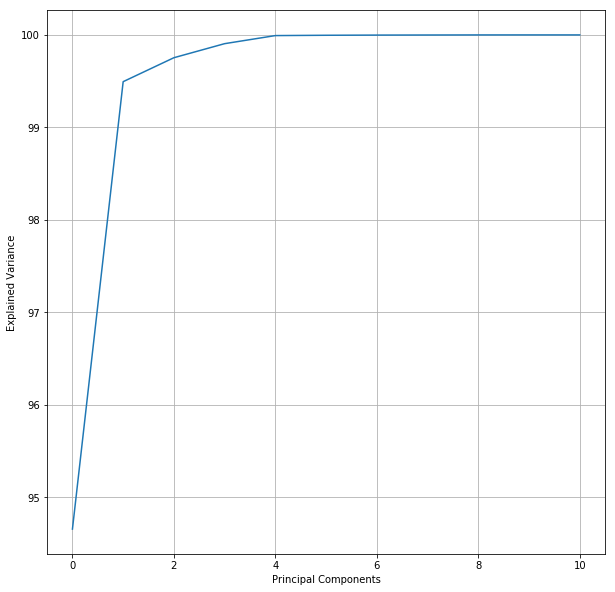

In [40]:
#Plotting explained variance vs n_components for unscaled version
plt.figure(figsize=(10,10))
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.grid()

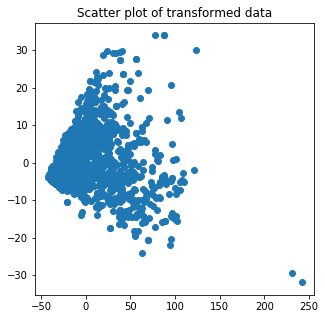

In [41]:
# Plotting scatter plot
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_pca)
plt.figure(figsize=(5,5))
plt.title("Scatter plot of transformed data")
plt.scatter(x_pca[:,0],x_pca[:,1])

We can see that to retain 95% of the variation of original data, we need just 0.2 components, i.e 1 component. We also looked at the scatter plot for the data. We will try to do the same analysis by standardizing the data now. We will use the sklearn Standard Scaler to standardize the data.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
sc = StandardScaler()
data_pca = sc.fit_transform(data_pca)
x_pca = pca.fit_transform(data_pca)

In [43]:
# Basic analysis
print("Initial Shape:",data_pca.shape)
print("PCA Shape:",x_pca.shape)
print("PCA components:",pca.n_components_)

#Printing the eigen values and eigen vectors of the data
print("Eigen Values:", pca.explained_variance_)
print("Eigen Vector:",pca.components_)

Initial Shape: (1599, 11)
PCA Shape: (1599, 11)
PCA components: 11
Eigen Values: [3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.66002104
 0.58415655 0.42322138 0.34485779 0.18144664 0.05959558]
Eigen Vector: [[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]
 [-0.12330157 -0.44996253  0.23824707  0.10128338 -0.09261383  0.42879287
   0.3224145  -0.33887135  0.05769735  0.27978615  0.47167322]
 [-0.22961737  0.07895978 -0.07941826 -0.37279256  0.66619476 -0.04353782
  -0.03457712 -0.17449976 -0.00378775  0.55087236 -0.12218109]
 [-0.08261366  0.21873452 -0.05857268  0.73214429  0.2465009  -0.15915198
  -0.22246456  0.15707671  0.26752977  0.22596222  0.35068141]
 [ 0.10147858  0.41144893  0.06959338  0.04915555  0.30433857 -0.01400021
   0.13630755 -0.39115

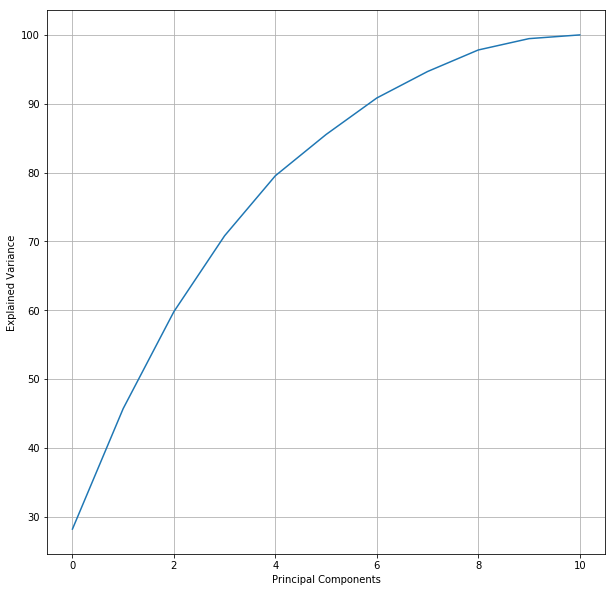

In [44]:
#Plotting explained variance vs n_components for unscaled version
plt.figure(figsize=(10,10))
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.grid()

We can see that to retain 95% of the variation of standardized data, we need just 9 components. Now, we will plot the scatter plot for the standardized data.

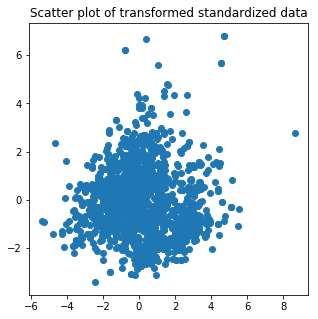

In [45]:
# Plotting scatter plot
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_pca)
plt.figure(figsize=(5,5))
plt.title("Scatter plot of transformed standardized data")
plt.scatter(x_pca[:,0],x_pca[:,1])